## PHY 411: Final Project
### Jeremy Kazimer
### 5018-1732

---

#### _Import Statements_

To begin this portion of the project, we import the Python file I created which contains the network class and its methods.  We also import the file which contains the entropy methods:

In [1]:
from generate_network import *
from calculate_entropy import *

Consider that an explanation of the code is partially within the .py itself, but also in the documentation on GitHub.  We can also import `numpy`, `matplotlib`, `scipy`, and `time` such that we can use their code here:

In [19]:
import time
from numpy import linspace, mean, sqrt, zeros
from matplotlib import pyplot as plt

Now, we can begin the standard procedure of creating a network:

#### _Generating Networks_

Better specification can be found in the `network_analysis.ipynb` notebook.  We are just repeating the steps there, since we cannot import data across notebooks.

In [3]:
N = 100
p = 0.25

In [4]:
G = Erdos_Renyi_GNP(N, p)

With the graph object created, we can now look at the eigenvalues and entropy:

#### _Looking at Eigenvalues_

First, note that the eigenvalues come from the linear algebra equation

\begin{equation}
\{\lambda\} = \text{det}(L - \lambda I)
\end{equation}

where $\{\lambda\}$ is the set of eigenvalues, $L$ is the Laplacian, $I$ is the identity matrix, and the det operator is the determinant of that difference.  We can then define

\begin{equation} L\vec{v}_i = \lambda_i \vec{v}_i \end{equation}

where $\vec{v}_i$ is the $i$-th eigenvector associated with the $i$-th eigenvalue, where $i \in |\{\lambda\}|$.  Solving these matrix equations results in said eigenvectors.

The analysis of the eigenvalues and eigenvectors is henceforth known as spectral analysis, something that aligns closely with principal component analysis (PCA).  In analyzing the eigenvalues, we can get a bigger picture of exactly what is going underneath the semantics of the network.  For example, it is always true that

\begin{equation}
\lambda_1 \approx 0
\end{equation}

It might not always be zero, depending on the libraries used in order to calculate the eigenvalues.  What I mean by this is that otherwise it would be a number that falls below machine precision.  In more recent developments, the number of zero eigenvalues is related to the number of communities, $k$.  That is to say

\begin{equation}
k = |\{\lambda_i: \lambda_i = 0 \text{ for } i \in |\{\lambda\}|\}|
\end{equation}

This is only really true for larger structures, the threshold indeterminate at this point.  Really, it cannot be used to pick up substructures.  Regardless, we can take a look at the histogram of the eigenvalues of our graph to get an idea: 

In [5]:
eigenvalues = G.eigenvalues

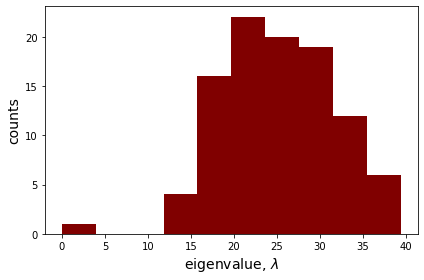

In [6]:
fig, ax = plt.subplots(1, 1)

ax.hist(eigenvalues, sqrt(N).astype(int), color = 'maroon')

ax.set_ylabel('counts', fontsize = 14)
ax.set_xlabel(r'eigenvalue, $\lambda$', fontsize = 14)

fig.tight_layout()

There are two things to note here.  The first, that there is only one $\lambda = 0$ such that there is only one community.  We can verify this via our `networkx` plot:

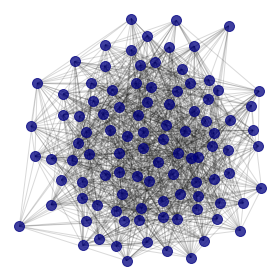

In [7]:
G.plot_networkx();

It is apparent that every node is somewhat connected to each other; there is no clear distinction between any set of nodes at this level.  Second, the average eigenvalue is

In [8]:
print('average eigenvalue: {:.2f}'.format(mean(eigenvalues)))

average eigenvalue: 25.20


If we ignore the first value, that is to say the first zero (eigenvalues are ordered ascendingly), this is more precisely: 

In [9]:
print('average eigenvalue: {:.2f}'.format(mean(eigenvalues[1:])))

average eigenvalue: 25.45


It is generally known that for the $N$ eigenvalues that there will be $N - k$ eigenvalues gravitating around the value

\begin{equation}
\bar{\lambda} \approx N \cdot p
\end{equation}

with $k$ eigenvalues at $0$.  We can verify this:

In [10]:
print('expected eigenvalue: {:.2f}'.format(N*p))

expected eigenvalue: 25.00


So, the value is close,  With more nodes this will converge even further.  That being said, the eigenvalues lead into the use of entropy:

#### _Looking at Entropy_

For the purposes of this project, we define entropy $H$ to be

\begin{equation}
H = -\sum_i p_i \log2 p_i
\end{equation}

where $p_i$ is any function such that $\sum p_i = 1$.  In this case, it is uniquely true that

\begin{equation}
\sum_i \dfrac{\lambda_i}{2M} = 1
\end{equation}

so our entropy, henceforth denoted as $H_M$, can be represented by this proportion.  Really, what this represents is the density of the matrix.  That is to say how strongly connected each node is.  Consider that earlier we defined $\lambda \approx N \cdot p$, so making a denser matrix results in higher $\{\lambda\}$ values.  As such, since $p_i \log2 p_i$ is a strictly increasing function, increasing $N$ or $p$ will result in higher entropy, thus reflecting a denser matrix.  We can see this below, by first seeing the structure of the entropy:

In [12]:
entropy = m_entropy(G)

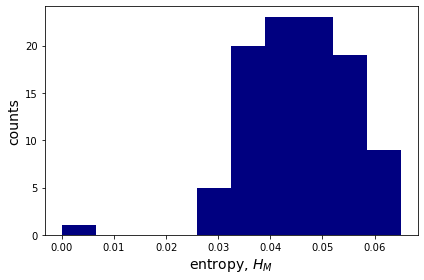

In [14]:
fig, ax = plt.subplots(1, 1)

ax.hist(entropy, sqrt(N).astype(int), color = 'navy')

ax.set_ylabel('counts', fontsize = 14)
ax.set_xlabel(r'entropy, $H_M$', fontsize = 14)

fig.tight_layout()

It is evident that the entropy components take on a similar distribution to that of the eigenvalues, which confirms our suspicions at least in the regard that they are monotomic functions.  However, we can change $p$ over time and see that $H_M$ also increases.  We won't start at $p = 0$, since this is just going to give us an entropy of $0$, so to better reflect the structure we'll start at $p = 0.1$:

In [38]:
N = 100
ps = linspace(0.1, 1, 101)
Hms = zeros((ps.shape[0]))

In [39]:
for idx, p in enumerate(ps):
    G1 = Erdos_Renyi_GNP(N, p)
    Hms[idx] = m_entropy(G1).sum()

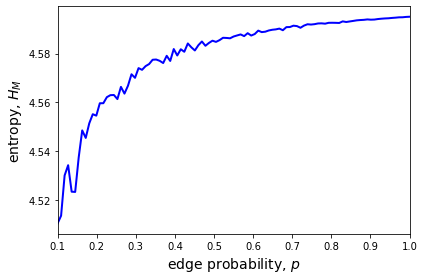

In [47]:
fig, ax = plt.subplots(1, 1)

ax.plot(ps, Hms, lw = 2, c = 'blue')

ax.set_xlim(ps[0], ps[-1])

ax.set_ylabel(r'entropy, $H_M$', fontsize = 14)
ax.set_xlabel(r'edge probability, $p$', fontsize = 14)

fig.tight_layout()

This agrees with our original proposal.  But now? We can also verify this for varying $N$, since $\lambda$ is a factor of both after all:

In [64]:
Ns = arange(10, 101)
p = 0.25
Hms = zeros((Ns.shape[0]))

In [65]:
for idx, N in enumerate(Ns):
    G1 = Erdos_Renyi_GNP(N, p)
    Hms[idx] = m_entropy(G1).sum()

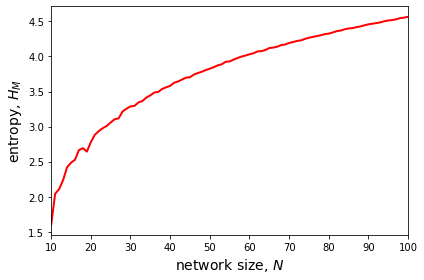

In [66]:
fig, ax = plt.subplots(1, 1)

ax.plot(Ns, Hms, lw = 2, c = 'red')

ax.set_xlim(Ns[0], Ns[-1])

ax.set_ylabel(r'entropy, $H_M$', fontsize = 14)
ax.set_xlabel(r'network size, $N$', fontsize = 14)

fig.tight_layout()

Interestingly, the function is a bit smoother, but it has the same general shape.  This is really that of the form of entropy - this is a $-xlogx$ function.